# ---------------------- Experiment SoA DATA PREPARATION ----------------------

### Link do podsumowania i opisów:
https://docs.google.com/document/d/1EJS4VNvU7QPxjEvYc-keg6CIpknSgNK07MdYV779hFo/edit#

### ↓↓↓↓↓↓ Pamiętać!!! ↓↓↓↓↓↓

Sprawdzić które osoby należy wyrzucić ze względu na ilość błędów (sekcja: Below correctness in main blocks).

Na razie następujące osoby (mają od kilkunastu procent poprawności do 47%): <br>
**WYRZUCONE**: <br>
- 030 gr2: 0.143878 
- 060 gr2: 0.007081
- 062 gr1: 0.335079 (badanie przerwane w czasie drugiego bloku)
-  15 gr1: 0.479769 <br>

**do SPRAWDZENIA**:
-    065 gr1: 0.72043 poprawnych odpowiedzi <br>
-    080 gr2: 0.77285 poprawnych <br>
-    029 gr1: 0.709337 poprawnych; pani przeszła 3 bloki procedury po czym została ona przerwana, ponieważ nie było różnicy w zaznaczaniu na skali <br>

### ↑↑↑↑↑↑ Pamiętać!!! ↑↑↑↑↑↑

In [1]:
import SoA_DataPreparation as dataprep

In [2]:
import numpy as np
import pandas as pd
import os
import os.path as op
import glob
from scipy import stats

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
PTH = r"C:\PhD_SoA_Study\senofag\exp\data"
# PTH = r"D:\PROCEDURY\senofag\exp\data"

In [5]:
fls = glob.glob(op.join(PTH, '*.csv'))
fls[:3]

['C:\\PhD_SoA_Study\\senofag\\exp\\data\\SoA_1_005_prime_detection_1.csv',
 'C:\\PhD_SoA_Study\\senofag\\exp\\data\\SoA_1_005_prime_detection_2.csv',
 'C:\\PhD_SoA_Study\\senofag\\exp\\data\\SoA_1_005_regular_block_1.csv']

In [6]:
# Below at home:
# for idx, val in enumerate(fls):
#     print(idx, val.split('\\')[6])

# Below in the lab:
# for idx, val in enumerate(fls):
#     print(idx, val.split('\\')[5])

# ------------- DataFrame preparation (SoA & RT) -------------

In [7]:
df = dataprep.DF_prep()

df.head()

Number of rows = 20651
Number of persons = 31
Persons' numbers = ['005' '008' '009' '016' '019' '022' '023' '024' '026' '028' '029' '038'
 '052' '055' '065' '069' '070' '074' '077' '080' '084' '086' '088' '091'
 '093' '096' '098' '099' '103' '105' '117']
{'Group_1': 15, 'Group_2': 16}


,Unnamed: 0,cond,choiceType,prime,target,effect,corrResp,resp,pos,block,...,RT,soa_rating,rating_RT,delay1,delay2,ITI,saveTime,subject_nr,block_nr,group_nr
0,1,comp,Free,prime_right.png,target_both.png,red,dl,l,-5.0,1,...,0.516441,1,7.214,46.0,104.0,67.0,0.003275,005,1,1
1,2,comp,Cued,prime_left.png,target_left.png,blue,d,d,5.0,1,...,0.310004,6,2.362,50.0,125.0,29.0,0.003189,005,1,1
2,3,comp,Cued,prime_left.png,target_left.png,blue,d,d,-5.0,1,...,0.464200,6,1.602,43.0,91.0,61.0,0.003173,005,1,1
3,4,comp,Cued,prime_left.png,target_left.png,blue,d,d,-5.0,1,...,0.556996,6,1.131,53.0,83.0,46.0,0.003183,005,1,1
4,5,incomp,Cued,prime_right.png,target_left.png,yellow,d,d,-5.0,1,...,0.538340,5,1.171,53.0,124.0,48.0,0.003187,005,1,1



#### Below correctness in main blocks:

In [8]:
pd.set_option('display.max_columns', 50)

In [9]:
df.pivot_table(values='ifcorr', columns='subject_nr', aggfunc='mean')

subject_nr,005,008,009,016,019,022,023,024,026,028,029,038,052,055,065,069,070,074,077,080,084,086,088,091,093,096,098,099,103,105,117
ifcorr,0.94825,0.913303,0.890694,0.972265,0.815603,0.957187,0.99688,0.83908,0.921922,0.836442,0.709337,0.981424,0.868613,0.887906,0.72043,0.913303,0.94825,0.921922,0.978362,0.772853,0.957187,0.981424,0.987578,0.987578,0.939394,0.981424,0.96319,0.972265,0.954198,0.978362,0.924812


# ------------- Data Visualization (SoA & RT) ------------- 

## ****** SoA rating ******

### A pointplot for all subjects

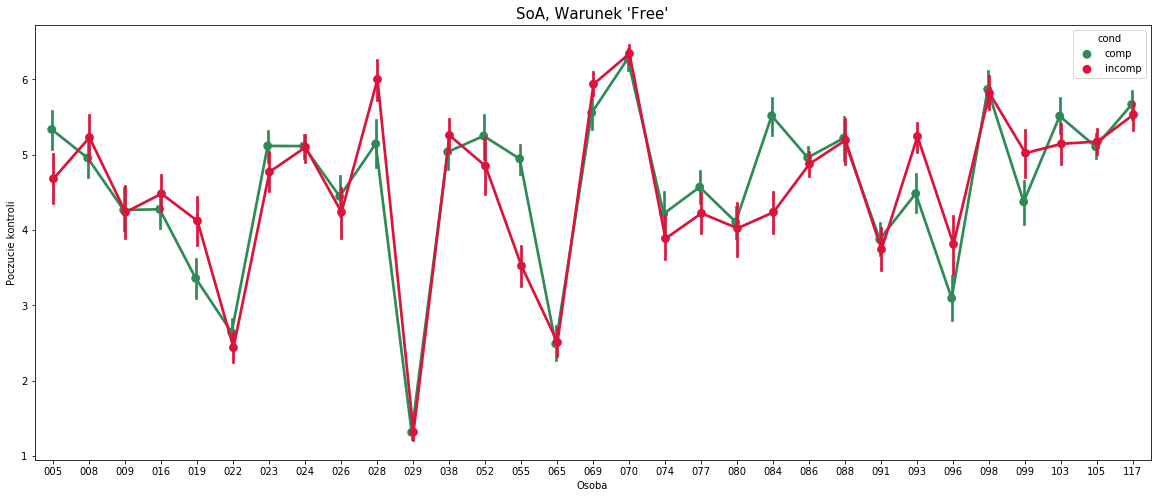

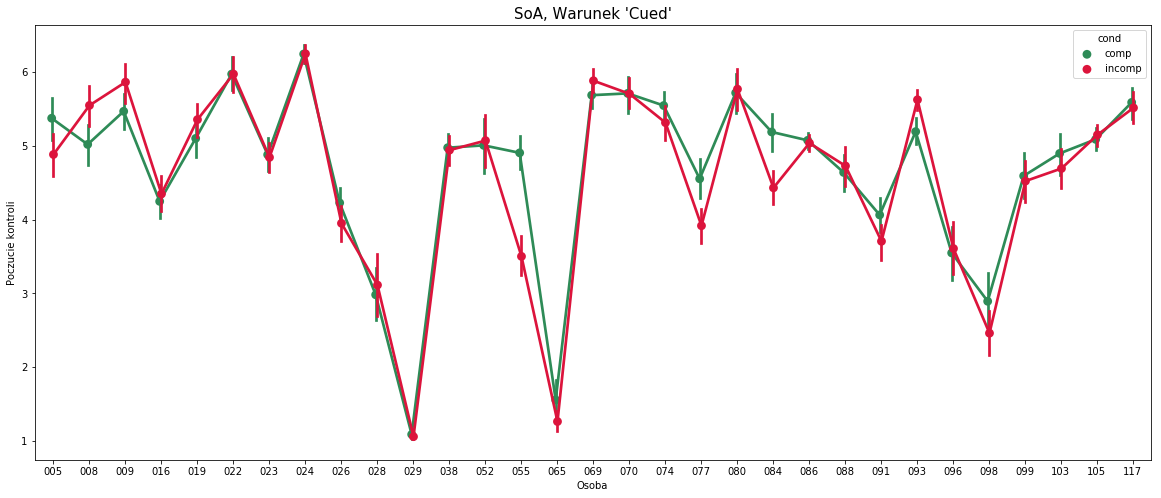

In [10]:
plt.figure(1, figsize=(20, 8))

axis = sns.pointplot(x='subject_nr', y='soa_rating', hue='cond', data=df.query('ifcorr == True').query('choiceType == "Free"'), 
              palette=('seagreen', 'crimson'), dodge=True)
axis.set_ylabel("Poczucie kontroli")
axis.set_xlabel("Osoba")
axis.set_title("SoA, Warunek 'Free'", fontsize=15)

plt.figure(2, figsize=(20, 8))
axis = sns.pointplot(x='subject_nr', y='soa_rating', hue='cond', data=df.query('ifcorr == True').query('choiceType == "Cued"'), 
              palette=('seagreen', 'crimson'), hue_order=('comp', 'incomp'), dodge=True)
axis.set_ylabel("Poczucie kontroli")
axis.set_xlabel("Osoba")
axis.set_title("SoA, Warunek 'Cued'", fontsize=15)

### Plots for particular subjects - SoA rating


In [11]:
df.head()

,Unnamed: 0,cond,choiceType,prime,target,effect,corrResp,resp,pos,block,fixTime,ifcorr,RT,soa_rating,rating_RT,delay1,delay2,ITI,saveTime,subject_nr,block_nr,group_nr
0,1,comp,Free,prime_right.png,target_both.png,red,dl,l,-5.0,1,121,True,0.516441,1,7.214,46.0,104.0,67.0,0.003275,005,1,1
1,2,comp,Cued,prime_left.png,target_left.png,blue,d,d,5.0,1,121,True,0.310004,6,2.362,50.0,125.0,29.0,0.003189,005,1,1
2,3,comp,Cued,prime_left.png,target_left.png,blue,d,d,-5.0,1,124,True,0.464200,6,1.602,43.0,91.0,61.0,0.003173,005,1,1
3,4,comp,Cued,prime_left.png,target_left.png,blue,d,d,-5.0,1,125,True,0.556996,6,1.131,53.0,83.0,46.0,0.003183,005,1,1
4,5,incomp,Cued,prime_right.png,target_left.png,yellow,d,d,-5.0,1,108,True,0.538340,5,1.171,53.0,124.0,48.0,0.003187,005,1,1


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


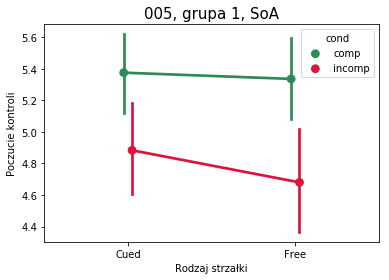

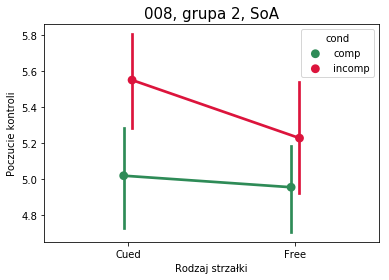

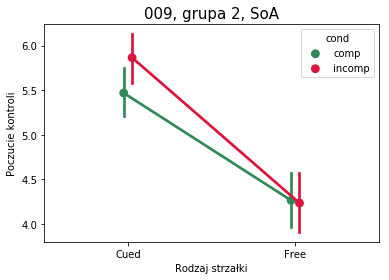

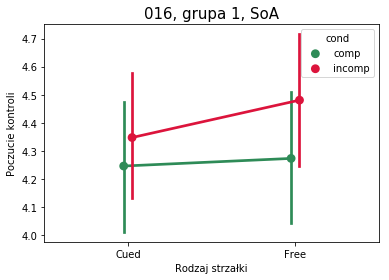

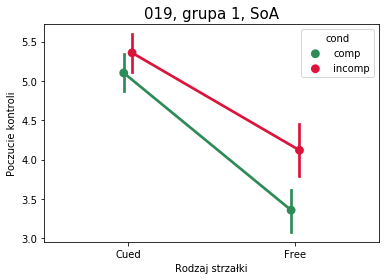

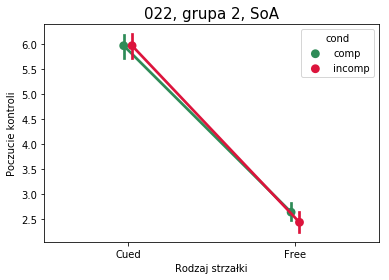

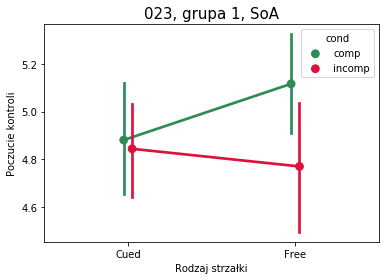

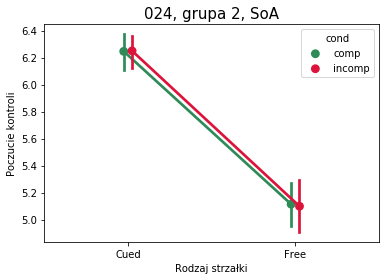

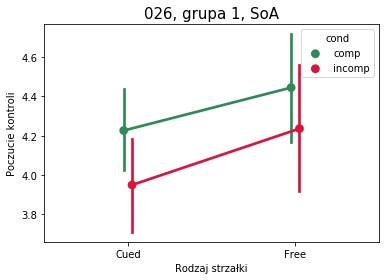

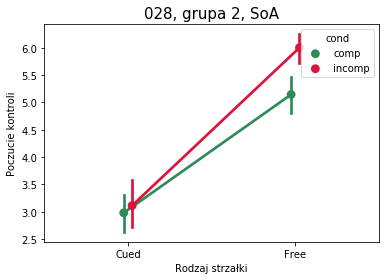

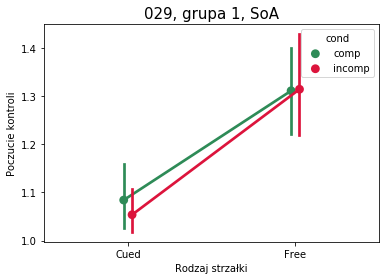

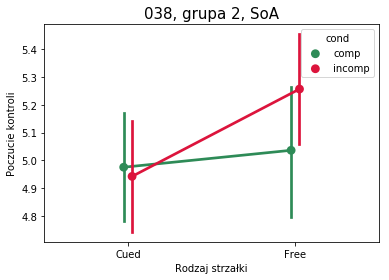

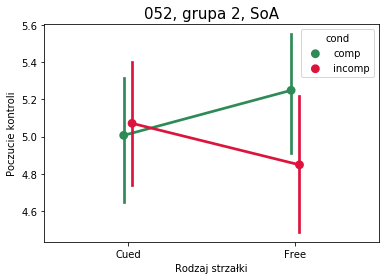

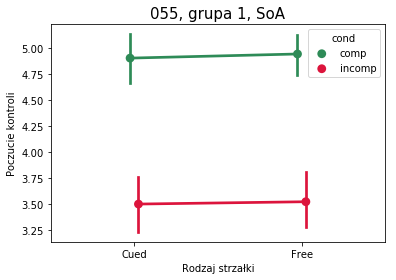

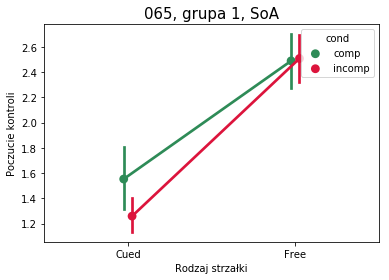

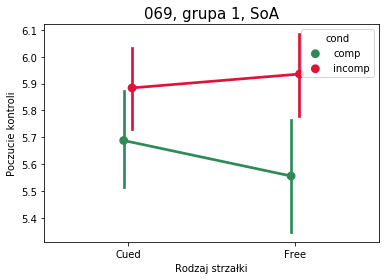

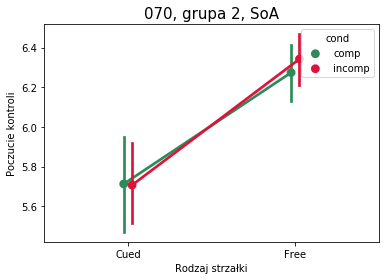

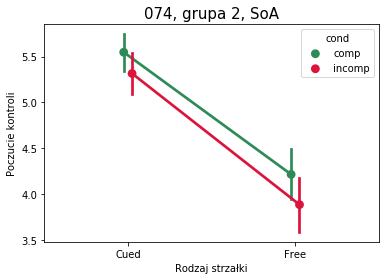

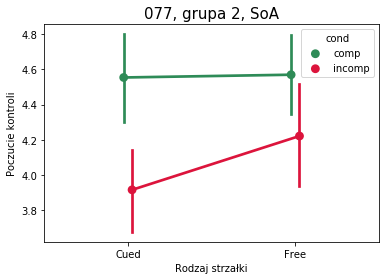

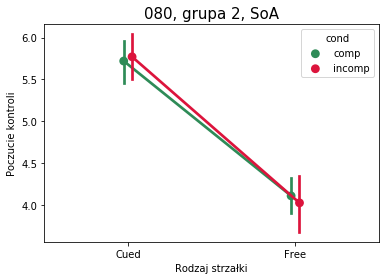

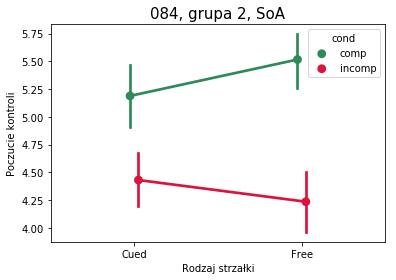

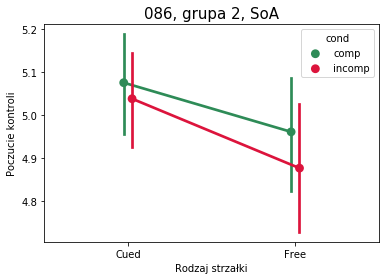

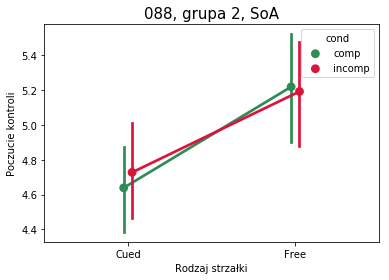

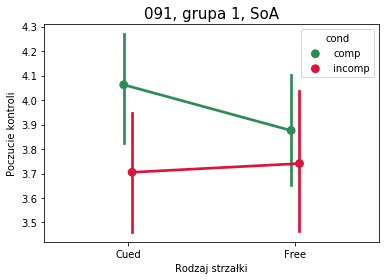

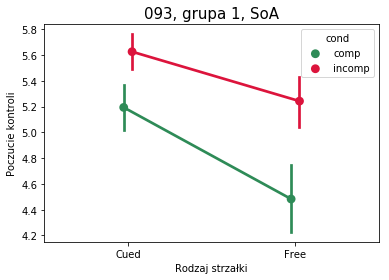

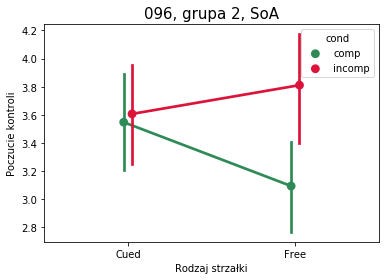

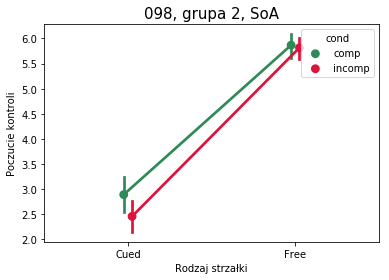

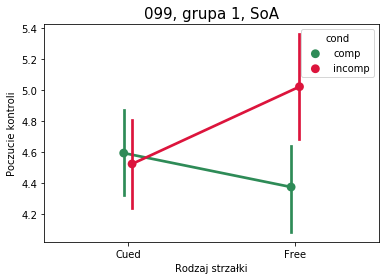

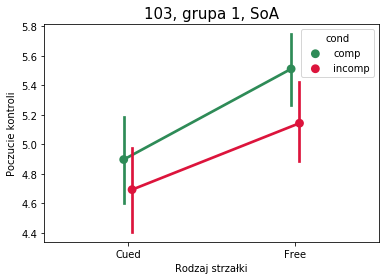

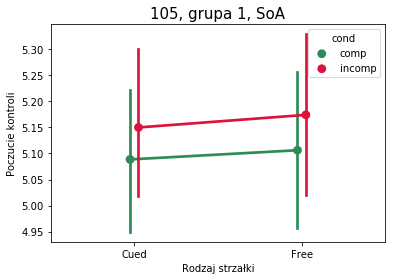

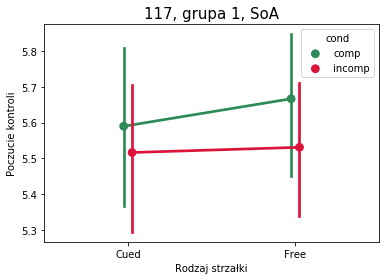

In [12]:
for num, name in enumerate(np.unique(df['subject_nr'])):
    plt.figure(num)
    subject = df.query('ifcorr == True').query('subject_nr == "{}"'.format(name))
    axis = sns.pointplot(x='choiceType', y='soa_rating', order=('Cued', 'Free'), hue='cond', hue_order=('comp', 'incomp'), 
                         data=subject, palette=('seagreen', 'crimson'), dodge=True)
    axis.set_title('{}, grupa {}, SoA'.format(name, str(np.unique(subject.group_nr))[1]), fontsize=15)
    axis.set_ylabel("Poczucie kontroli")
    axis.set_xlabel(u"Rodzaj strzałki")

## SoA rating divided by blocks for each subject

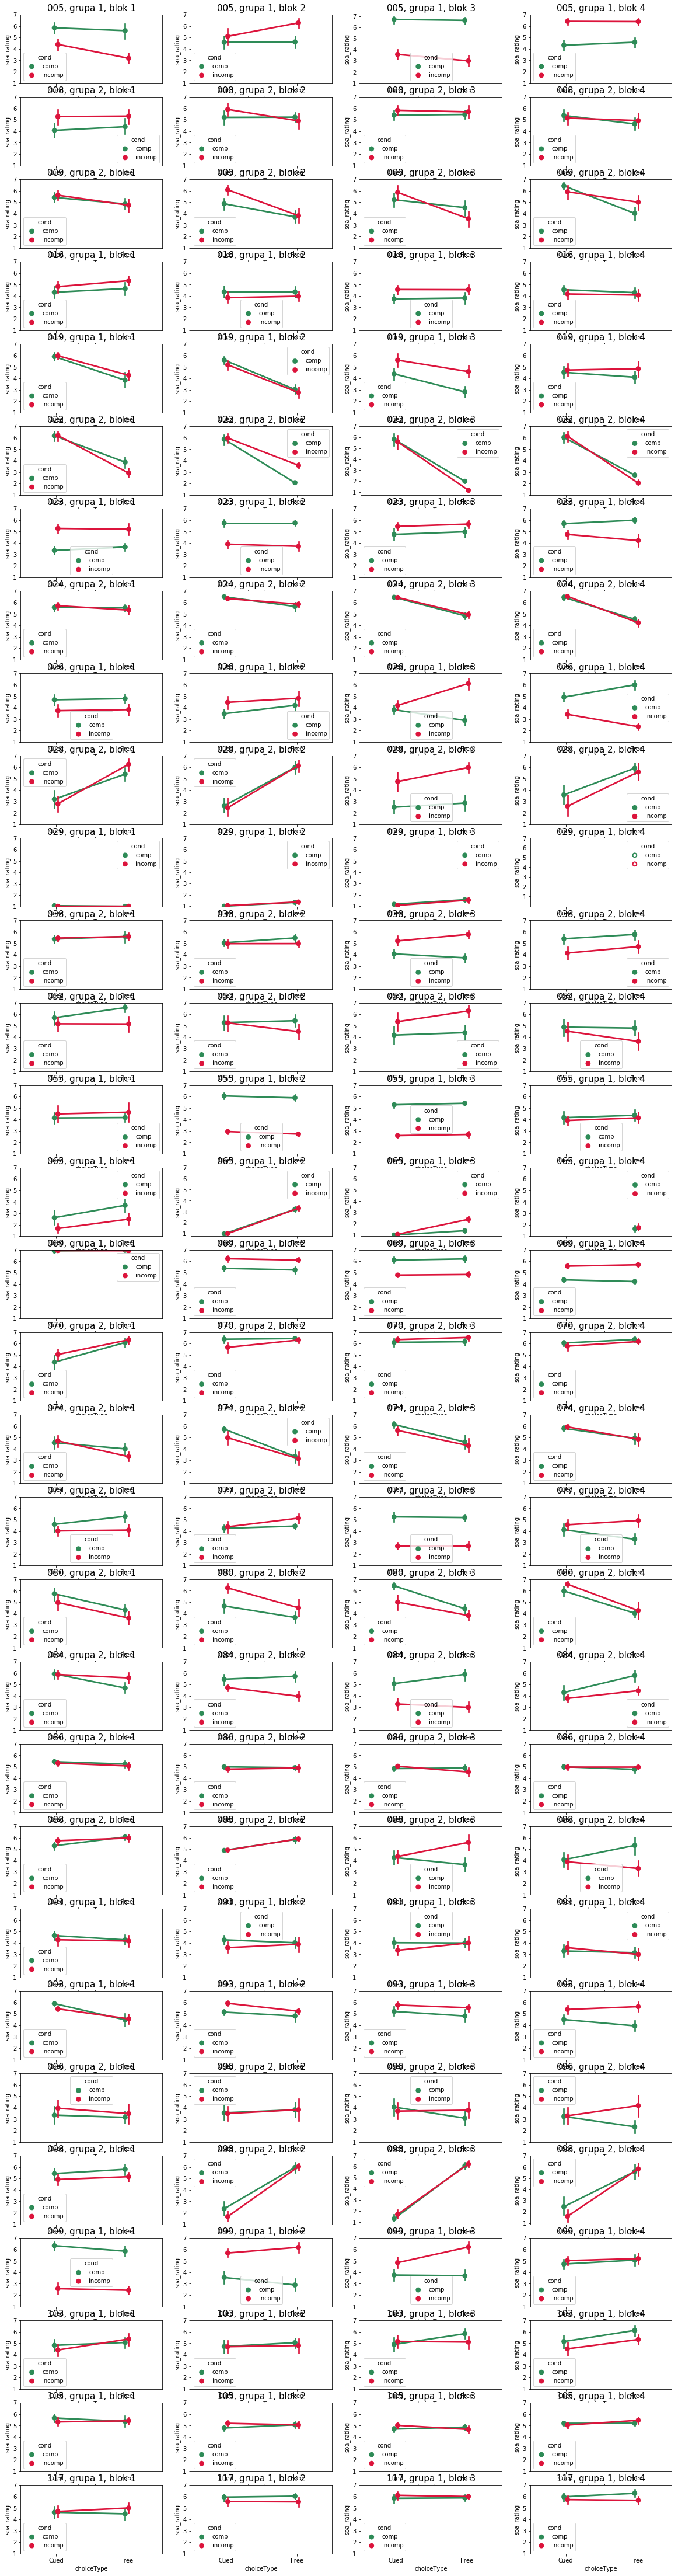

In [13]:
# Create a figure to be filled with plots
fig, ax = plt.subplots(ncols=4, nrows=len(np.unique(df['subject_nr'])), figsize=(20, 80))

# Iterate through subjects and blocks and fill the figure
for num, name in enumerate(np.unique(df['subject_nr'])):
    
    # choose a proper subject
    subject = df.query('ifcorr == True').query('subject_nr == "{}"'.format(name))
    
    # plot for each block
    plt1 = sns.pointplot(x='choiceType', y='soa_rating', order=('Cued', 'Free'), hue='cond', hue_order=('comp', 'incomp'), 
                         data=subject.query('block == 1'), palette=('seagreen', 'crimson'), dodge=True,
                         ax=ax[num][0])
    plt2 = sns.pointplot(x='choiceType', y='soa_rating', order=('Cued', 'Free'), hue='cond', hue_order=('comp', 'incomp'), 
                         data=subject.query('block == 2'), palette=('seagreen', 'crimson'), dodge=True,
                         ax=ax[num, 1])
    plt3 = sns.pointplot(x='choiceType', y='soa_rating', order=('Cued', 'Free'), hue='cond', hue_order=('comp', 'incomp'), 
                         data=subject.query('block == 3'), palette=('seagreen', 'crimson'), dodge=True,
                         ax=ax[num, 2])
    plt4 = sns.pointplot(x='choiceType', y='soa_rating', order=('Cued', 'Free'), hue='cond', hue_order=('comp', 'incomp'), 
                         data=subject.query('block == 4'), palette=('seagreen', 'crimson'), dodge=True,
                         ax=ax[num, 3])
    
    # set labels and ticks
    x = range(1, 8)
    plt1.set_yticks(x)
    plt1.set_title('{}, grupa {}, blok {}'.format(name, str(np.unique(subject.group_nr))[1], 1), fontsize=15)
    plt2.set_yticks(x)
    plt2.set_title('{}, grupa {}, blok {}'.format(name, str(np.unique(subject.group_nr))[1], 2), fontsize=15)
    plt3.set_yticks(x)
    plt3.set_title('{}, grupa {}, blok {}'.format(name, str(np.unique(subject.group_nr))[1], 3), fontsize=15)
    plt4.set_yticks(x)
    plt4.set_title('{}, grupa {}, blok {}'.format(name, str(np.unique(subject.group_nr))[1], 4), fontsize=15)

## ****** RT ******

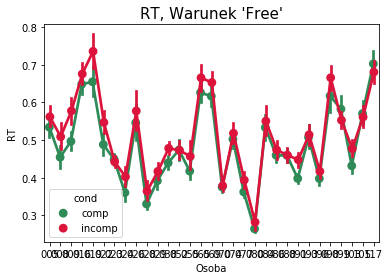

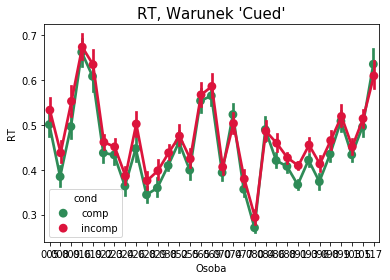

In [14]:
plt.figure(1)
axis = sns.pointplot(x='subject_nr', y='RT', hue='cond', data=df.query('ifcorr == True').query('choiceType == "Free"'), 
              palette=('seagreen', 'crimson'), dodge=True)
axis.set_ylabel("RT")
axis.set_xlabel("Osoba")
axis.set_title("RT, Warunek 'Free'", fontsize=15)

plt.figure(2)
axis = sns.pointplot(x='subject_nr', y='RT', hue='cond', data=df.query('ifcorr == True').query('choiceType == "Cued"'), 
              palette=('seagreen', 'crimson'), hue_order=('comp', 'incomp'), dodge=True)
axis.set_ylabel("RT")
axis.set_xlabel("Osoba")
axis.set_title("RT, Warunek 'Cued'", fontsize=15)

### Plots for particular subjects - RT

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


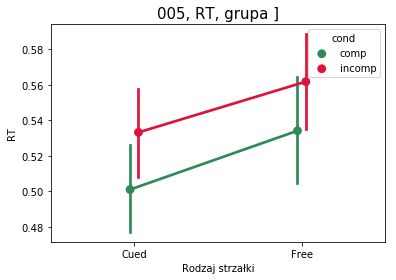

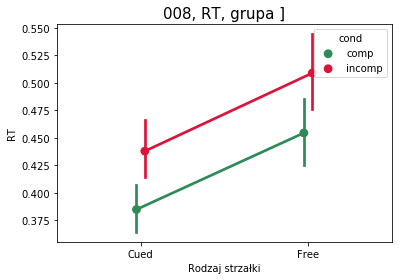

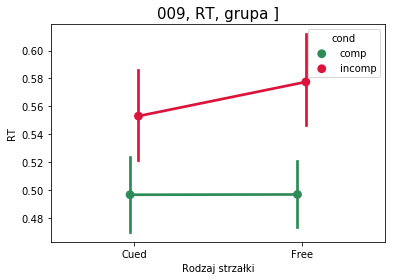

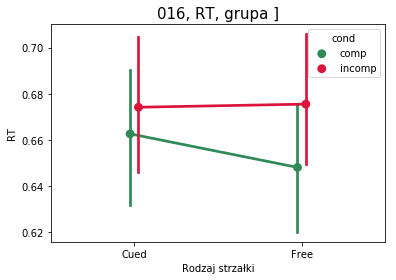

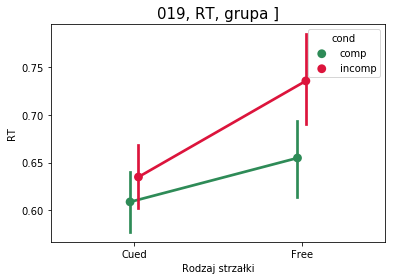

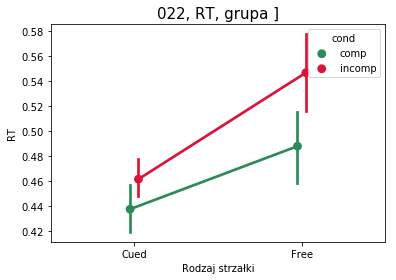

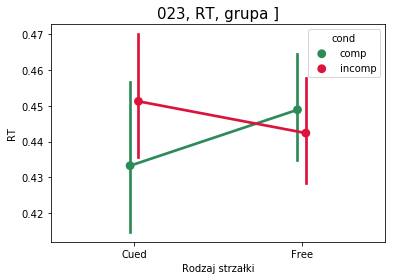

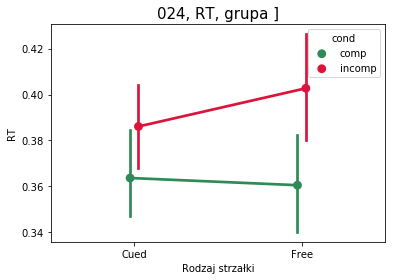

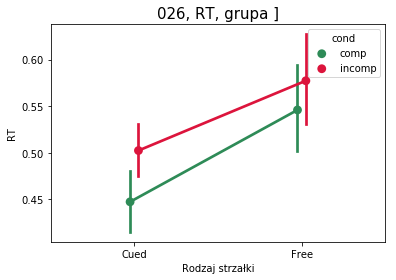

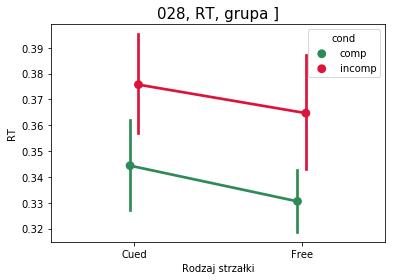

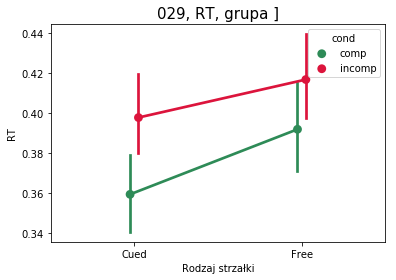

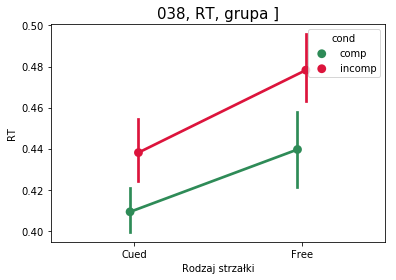

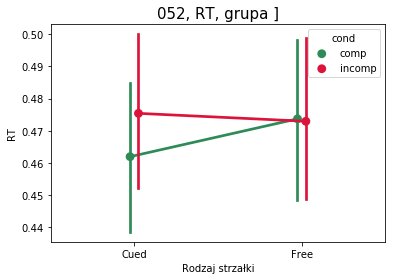

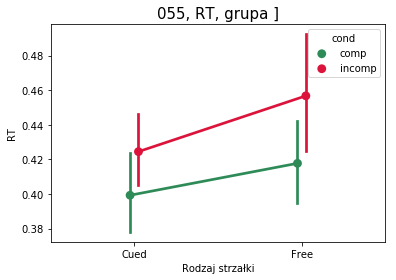

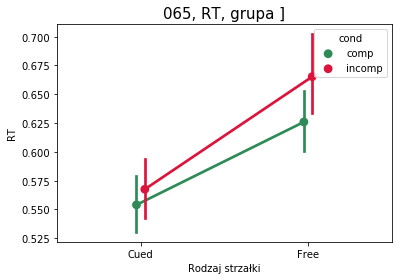

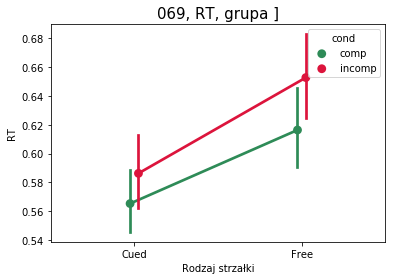

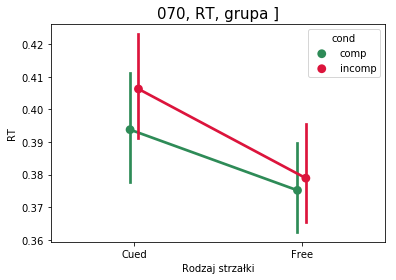

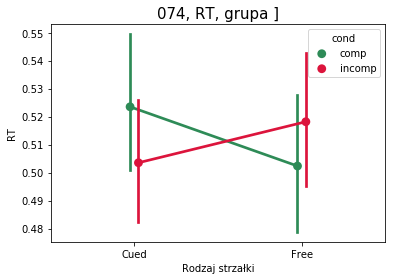

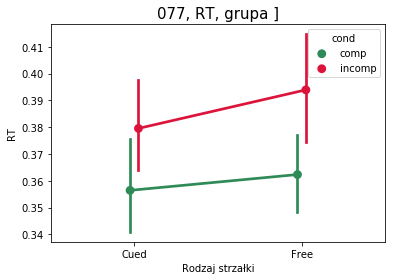

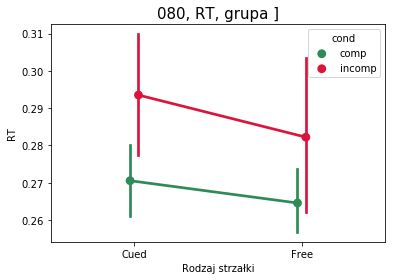

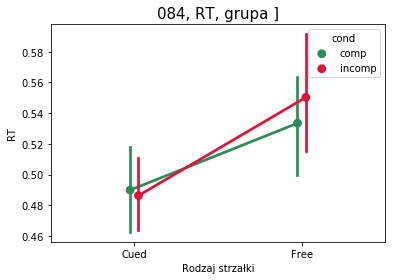

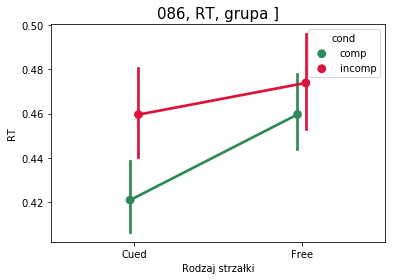

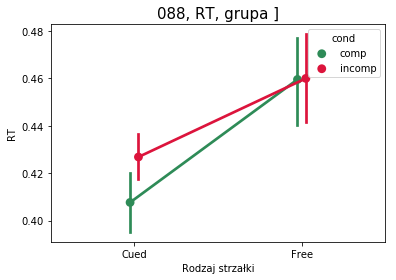

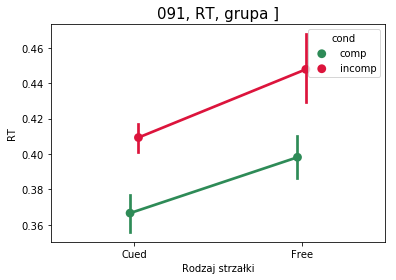

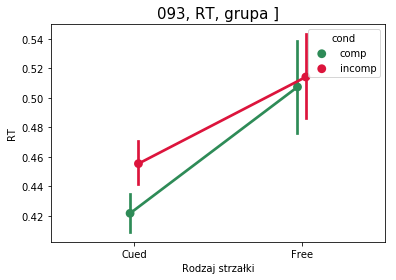

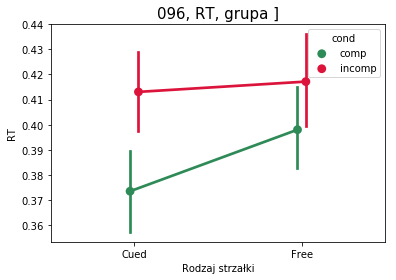

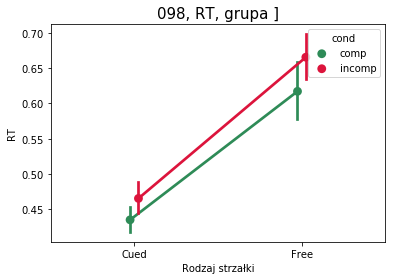

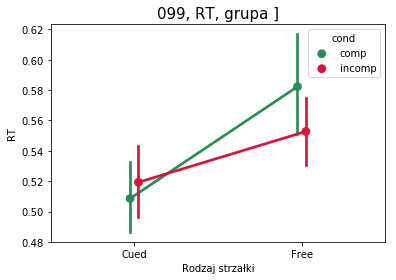

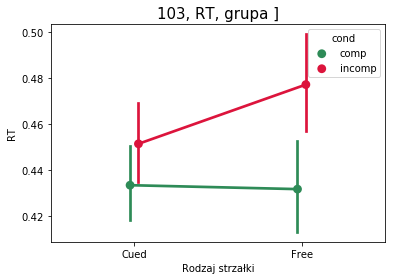

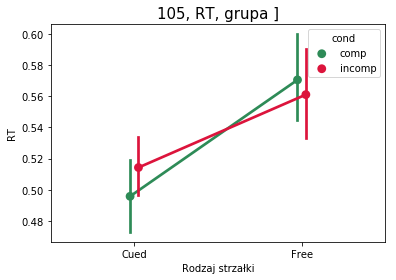

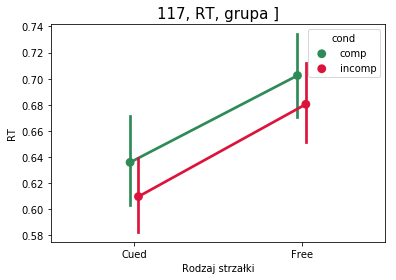

In [15]:
for num, name in enumerate(np.unique(df['subject_nr'])):
    plt.figure(num)
    subject = df.query('ifcorr == True').query('subject_nr == "{}"'.format(name))
    axis = sns.pointplot(x='choiceType', y='RT', order=('Cued', 'Free'), hue='cond', hue_order=('comp', 'incomp'), 
                         data=subject, palette=('seagreen', 'crimson'), dodge=True)
    axis.set_title('{}, RT, grupa {}'.format(name, str(np.unique(subject.group_nr))[2]), fontsize=15)
    axis.set_ylabel("RT")
    axis.set_xlabel(u"Rodzaj strzałki")

# ------------- DataFrame preparation (prime detection) -------------

In [16]:
df2 = dataprep.DF_prime_prep()

df2.head()

Number of rows = 7680
Number of persons = 30
Persons' numbers = ['005' '008' '009' '016' '019' '022' '023' '024' '026' '028' '038' '052'
 '055' '065' '069' '070' '074' '077' '080' '084' '086' '088' '091' '093'
 '096' '098' '099' '103' '105' '117']


,Unnamed: 0,cond,choiceType,prime,target,effect,corrResp,resp,pos,block,fixTime,ifcorr,RT,soa_rating,rating_RT,ITI,saveTime,subject_nr,block_nr,group_nr
0,1,comp,Free,prime_right.png,target_both.png,NaN,l,l,-5.0,1,126,1,0.828856,0,0.0,57.0,0.002972,005,1,1
1,2,incomp,Free,prime_right.png,target_both.png,cross,l,NoResp,-5.0,1,126,0,NaN,0,0.0,69.0,0.002825,005,1,1
2,3,comp,Cued,prime_right.png,target_right.png,NaN,l,l,5.0,1,121,1,0.370512,0,0.0,27.0,0.002805,005,1,1
3,4,comp,Cued,prime_left.png,target_left.png,NaN,d,d,5.0,1,121,1,0.048824,0,0.0,63.0,0.002783,005,1,1
4,5,comp,Free,NaN,target_both.png,NaN,space,l,5.0,1,114,0,0.533366,0,0.0,53.0,0.002813,005,1,1


# ------------- Data Visualization (prime detection) ------------- 

## Prime detection task - simple ratio of correct/incorrect identification of the arrow direction

In [17]:
print('Ratio correct/incorrect dla osoby:')

for num, name in enumerate(np.unique(df2['subject_nr'])):
    subject = df2.query('corrResp != "space"').query('subject_nr == "{}"'.format(name))
    print('osoba nr {} = {}'.format(name, np.mean(subject.ifcorr)))

Ratio correct/incorrect dla osoby:
osoba nr 005 = 0.4270833333333333
osoba nr 008 = 0.265625
osoba nr 009 = 0.5104166666666666
osoba nr 016 = 0.4375
osoba nr 019 = 0.296875
osoba nr 022 = 0.5052083333333334
osoba nr 023 = 0.3541666666666667
osoba nr 024 = 0.4791666666666667
osoba nr 026 = 0.515625
osoba nr 028 = 0.3802083333333333
osoba nr 038 = 0.005208333333333333
osoba nr 052 = 0.140625
osoba nr 055 = 0.5052083333333334
osoba nr 065 = 0.3229166666666667
osoba nr 069 = 0.010416666666666666
osoba nr 070 = 0.2916666666666667
osoba nr 074 = 0.4635416666666667
osoba nr 077 = 0.3385416666666667
osoba nr 080 = 0.4739583333333333
osoba nr 084 = 0.5052083333333334
osoba nr 086 = 0.421875
osoba nr 088 = 0.4791666666666667
osoba nr 091 = 0.6145833333333334
osoba nr 093 = 0.2916666666666667
osoba nr 096 = 0.453125
osoba nr 098 = 0.546875
osoba nr 099 = 0.24479166666666666
osoba nr 103 = 0.24479166666666666
osoba nr 105 = 0.3958333333333333
osoba nr 117 = 0.3489583333333333


## Prime detection task - applying signal detection theory